# Census Income

by: Israel Diaz

email: idiazg@udd.cl


## Description

### 1. Source: [UCI -  Census Income Data Set](http://archive.ics.uci.edu/ml/datasets/Census+Income)

US Census Bureau.

### 2. Description of the Data: 

Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions:

`((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))`

* `age`: continuous.
* `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* `fnlwgt`: The number of people the census takers believe that observation represents. continuous.
* `education`: The highest level of education achieved for that individual. This is nominal attribute. The ordered levels of the attributes: Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.
* `education-num`: Highest level of education in numerical form. This is continuous attribute.
* `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* `sex`: Female, Male.
* `capital-gain`: Capital gains recorded. continuous.
* `capital-loss`: Capital Losses recorded. continuous.
* `hours-per-week`: continuous.
* `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* `class`: >50K, <=50K




## Load Libraries and Data

In [1]:
## General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
import warnings
warnings.simplefilter("ignore")

## Machine Learning Libs
## Machine Learning Libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer,make_column_selector
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn import set_config
set_config(display='diagram')

In [2]:
## setting column names
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
            'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

## data urls
train_data = 'https://drive.google.com/uc?export=download&id=15jBe31Jx010YB9UwScEobI39U6Li9rML'
test_data = 'https://drive.google.com/uc?export=download&id=15gwyKg7ECdUyzstByfbp5w0kFXj9nEsE'

## loading data into dataframes
data_train = pd.read_csv(train_data, sep = ',', header=None, names=colnames)
data_test = pd.read_csv(test_data, sep = ',', header=None, names=colnames, skiprows=1)
data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## Data processing for EDA

For the purpose of the EDA I'll merge both datasets, but maintaining creating a new label that identifies each one with its origin.

In [3]:
data_train['train'] = 1
data_test['train'] = 0

In [4]:
display(data_train.head())
display(data_test.head())

print(f'Total Length: {len(data_train) + len(data_test)} observations')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,train
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,train
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,0


Total Length: 48842 observations


In [5]:
## merge datasete
alldata = pd.concat([data_train, data_test], ignore_index=True)

In [6]:
print(f'Merged data Length: {len(alldata)} observations')

Merged data Length: 48842 observations


### Duplicated Values and Inconsistencies

In [7]:
##Show number of duplicated vals
alldata.duplicated().sum()

29

In [8]:
## drop duplicated vals
alldata.drop_duplicates(inplace=True)

## Show results
alldata.duplicated().sum()

0

In [9]:
## Inconsistencies

alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  48813 non-null  object
 14  class           48813 non-null  object
 15  train           48813 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 6.3+ MB


All data types seems correct. No missing values, Now I'll look for inconsistencies inside the data

In [10]:
## Inconsistencies in the categorical variables.

for col in alldata.select_dtypes(include='object').columns:
    print(f'Variable: {col} \n{alldata[col].unique()} \n\n')

Variable: workclass 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


Variable: education 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


Variable: marital-status 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 


Variable: occupation 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 


Variable: relationship 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 


Variable: race 
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 


Va

**To-do:**

* Erase the white space of all classes.
* `workclass`, `occupation`, `native-country` change `?` to `Other`.
* `class` erase the `.` at the end of the classes.

In [11]:
replace = {'?':'Other',
           '<=50K.':'<=50K',
           '>50K.':'>50K'}

for col in alldata.select_dtypes(include='object').columns:
    alldata[col] = alldata[col].apply(lambda x: x.lstrip())
    alldata[col].replace(replace, inplace=True)


In [12]:
for col in alldata.select_dtypes(include='object').columns:
    print(f'Variable: {col} \n{alldata[col].unique()} \n\n')

Variable: workclass 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Other' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 


Variable: education 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 


Variable: marital-status 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 


Variable: occupation 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Other'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 


Variable: relationship 
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 


Variable: race 
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 


Variable: sex 
['Male' 'Female'] 


Variable: native-

All Good.

Finaly, I will remove repeated columns, such as `education-num` that is a numeric representation of `education`, and `fnlwgt` because this weight works like an identifier.

In [13]:
alldata.drop(columns=['education-num', 'fnlwgt'], axis=1, inplace=True)

## Exploratory Data Analysis

I'll plot histograms of all categorial variables and boxplots of numerical ones

In [14]:
#@title
def hist_bplot(df, col1, col2, bins='auto'):
  '''
    Display a histogram and a boxplot of two variables
    
    df = pandas dataframe
    col1 = variable 1 is going to be used to generate the histogram [string] type [numeric or categorical]
    col2 = variable 2 is going to be used to generate the boxplot. [string] type [numeric]
  '''

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

  #HISTOGRAM
  ax1.hist(df[col1], bins=bins, color='#29B6F6', histtype='bar', )

  #BOXPLOT
  ax2.boxplot(df[col2], notch ='True', vert = 0, patch_artist = True)
  ax2.axvline(np.median(df[col2]), color = 'red', linestyle='dashed', label = 'Median')
  ax2.axvline(np.percentile(df[col2], 25), color = 'grey', linestyle='dashed', label = 'Q1')
  ax2.axvline(np.percentile(df[col2], 75), color = 'grey', linestyle='dashed', label = 'Q3')

  #aesthetics
  fig.suptitle(f'{col1} Histogram and {col2} Box Plot', fontsize= 15)
  ax1.set_xlabel('{col1}')
  ax1.set_ylabel('Count')
  ax2.set_ylabel(col2)
  ax2.legend()

  ### Procedure from https://stackoverflow.com/questions/18194136/showing-specific-xtick-in-matplotlib
  # Get current tick locations and append 271 to this array
  x_ticks = np.append(ax2.get_xticks(), [np.percentile(df[col2], 25), np.percentile(df[col2], 75), np.median(df[col2])])

  # Set xtick locations to the values of the array `x_ticks`
  ax2.set_xticks(x_ticks)
  ###
  plt.savefig(f'img/{col1}_histogram_{col2}_boxplot.jpg')
  plt.show()
  ### subplots taken from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

### Age Histogram and Boxplot

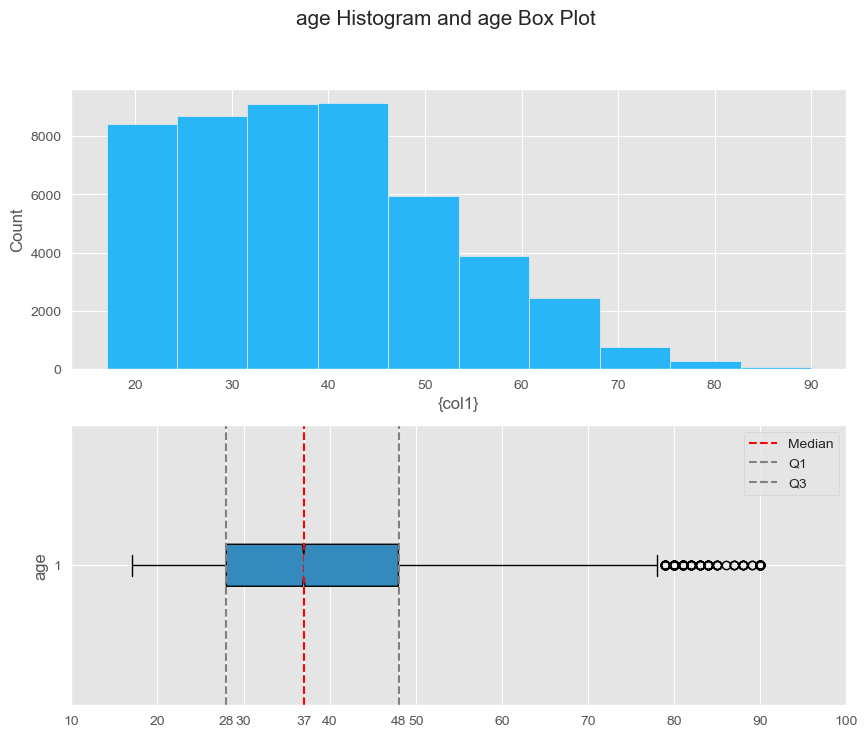

In [15]:
hist_bplot(alldata, col1='age', col2='age', bins=10)

* The age distribution is right skewed
* Median age = 37

### Class histogram by sex

In [16]:
#@title
def custom_histogram(data, main_classes, histo_classes, graph_height=3, share_axis = True, binwidth=None):
    '''
      Display histogram grid

      data = pandas dataframe
      main_classes = it will be used to generate the grid, if you have 3 clases will generate 3 subplots [string] type [categorical]
      histo_classes = it will  be used generate every subplot [string] type [categorical]
    '''

    ax = sns.FacetGrid(data = data,
                       col= main_classes,
                       sharex= share_axis, sharey= share_axis,
                       height=graph_height , aspect=1
                       )
    ax.map_dataframe(sns.histplot,
                     x=histo_classes,
                     color = '#29B6F6',
                     binwidth = binwidth,
                     ax = ax, )

    ax.fig.subplots_adjust(top=0.8)
    ax.fig.suptitle(f'{main_classes} histogram by {histo_classes}', fontsize= 15)
    ax.set_xticklabels(rotation=90)
    plt.savefig(f'img/{histo_classes}_per_{main_classes}.jpg')
    plt.show()

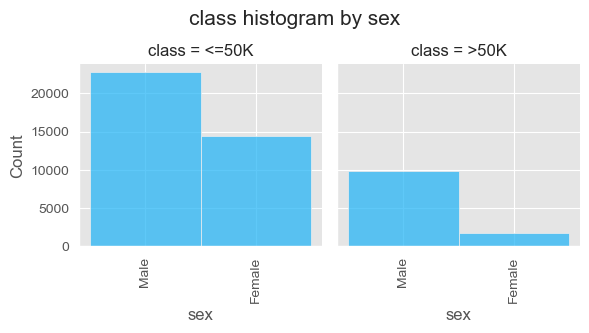

In [17]:
custom_histogram(data=alldata, main_classes='class', histo_classes='sex', graph_height=3)

* Both in `Male` and `Female` the amount of people in `<=50K` is greater than in `>50K`
* The proportion of `<=50K` in `Male` is twice and a half greater than `>50K` and in `Female` is 6 times.

### workclass by class countplot

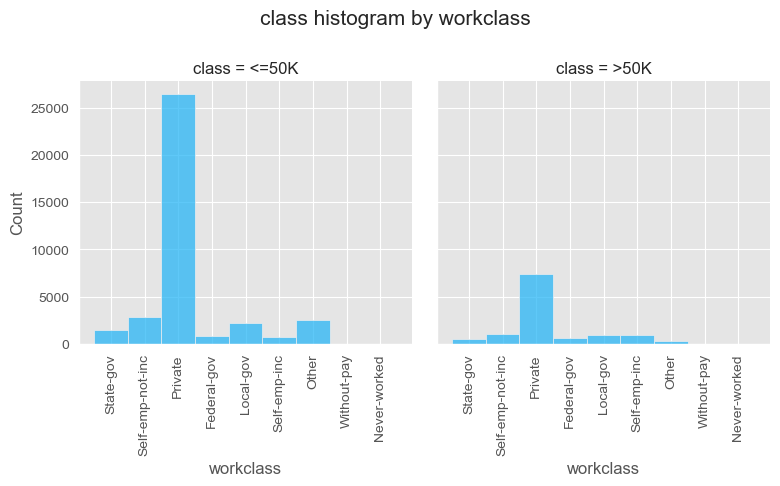

In [18]:
custom_histogram(data=alldata, main_classes='class', histo_classes='workclass', graph_height=4)

* class `State-gov` is highly predominant in `<=50K` class
* class `Private` is mostly predominant in `>50K` class

### Education by class

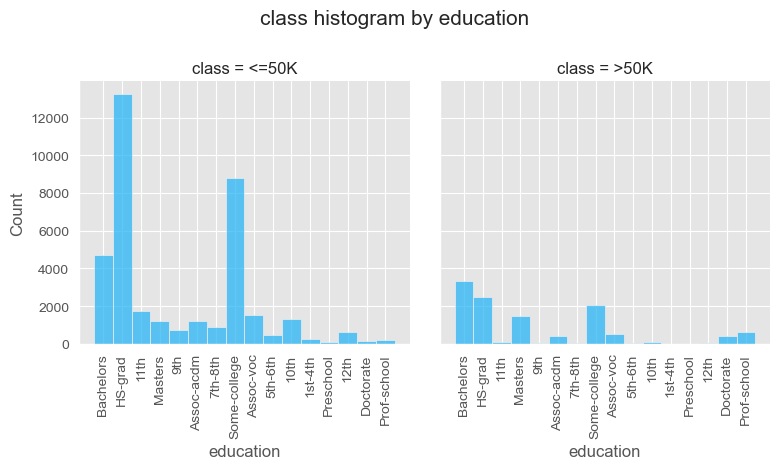

In [19]:
custom_histogram(data=alldata, main_classes='class', histo_classes='education', graph_height=4)

Very interesting insight here:
* The majority of the high skilled people of the data set are been paid under 50000.
* I see also very skilled people in `>50K` class

### Marital Status by class

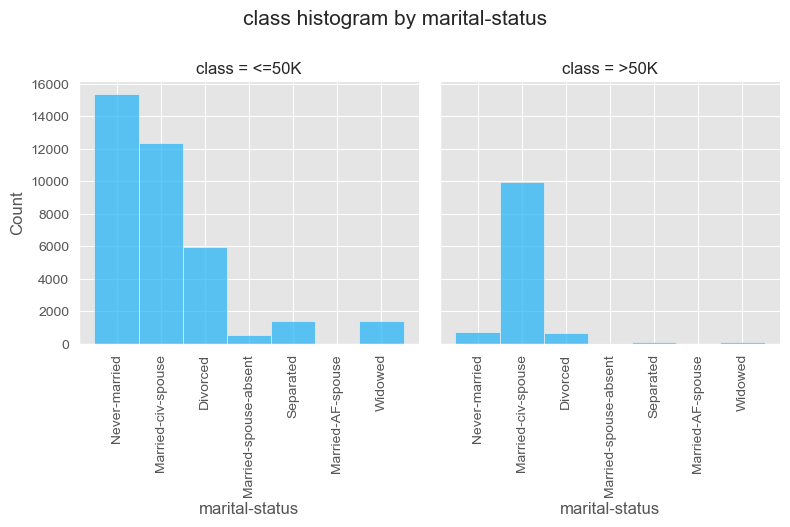

In [20]:
custom_histogram(data=alldata, main_classes='class', histo_classes='marital-status', graph_height=4)

### Occupation by class

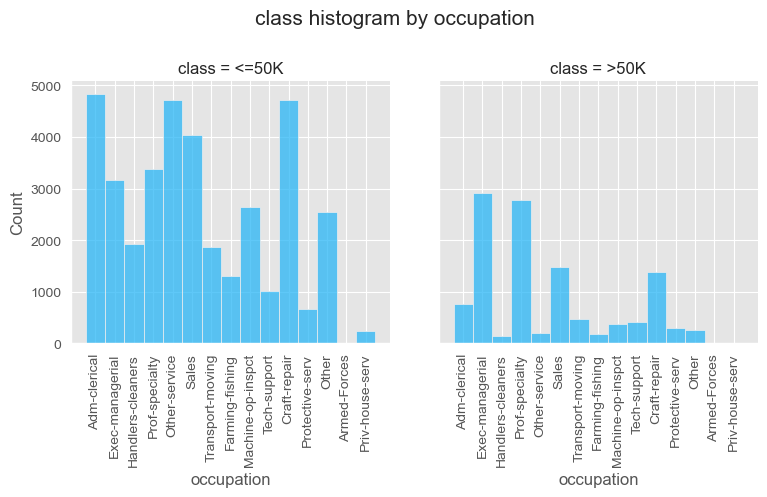

In [21]:
custom_histogram(data=alldata, main_classes='class', histo_classes='occupation', graph_height=4)

### Relationship by class

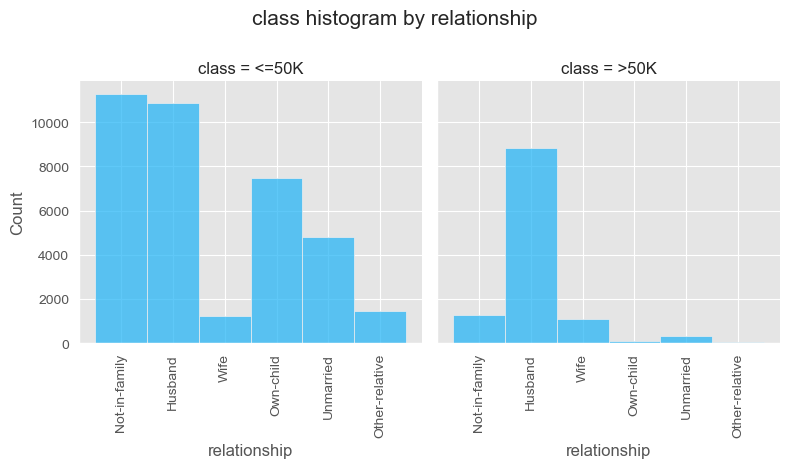

In [22]:
custom_histogram(data=alldata, main_classes='class', histo_classes='relationship', graph_height=4)

### race by class

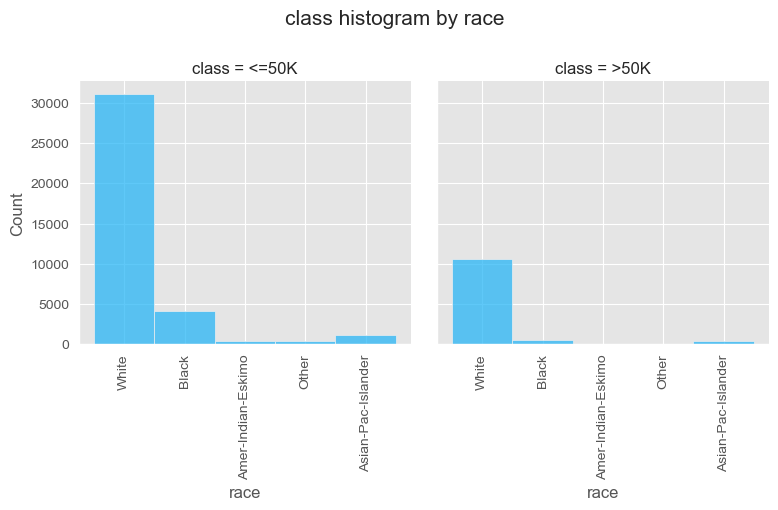

In [23]:
custom_histogram(data=alldata, main_classes='class', histo_classes='race', graph_height=4)

No important insight here, both graphs look similar but in different proportions.

### native-country by class

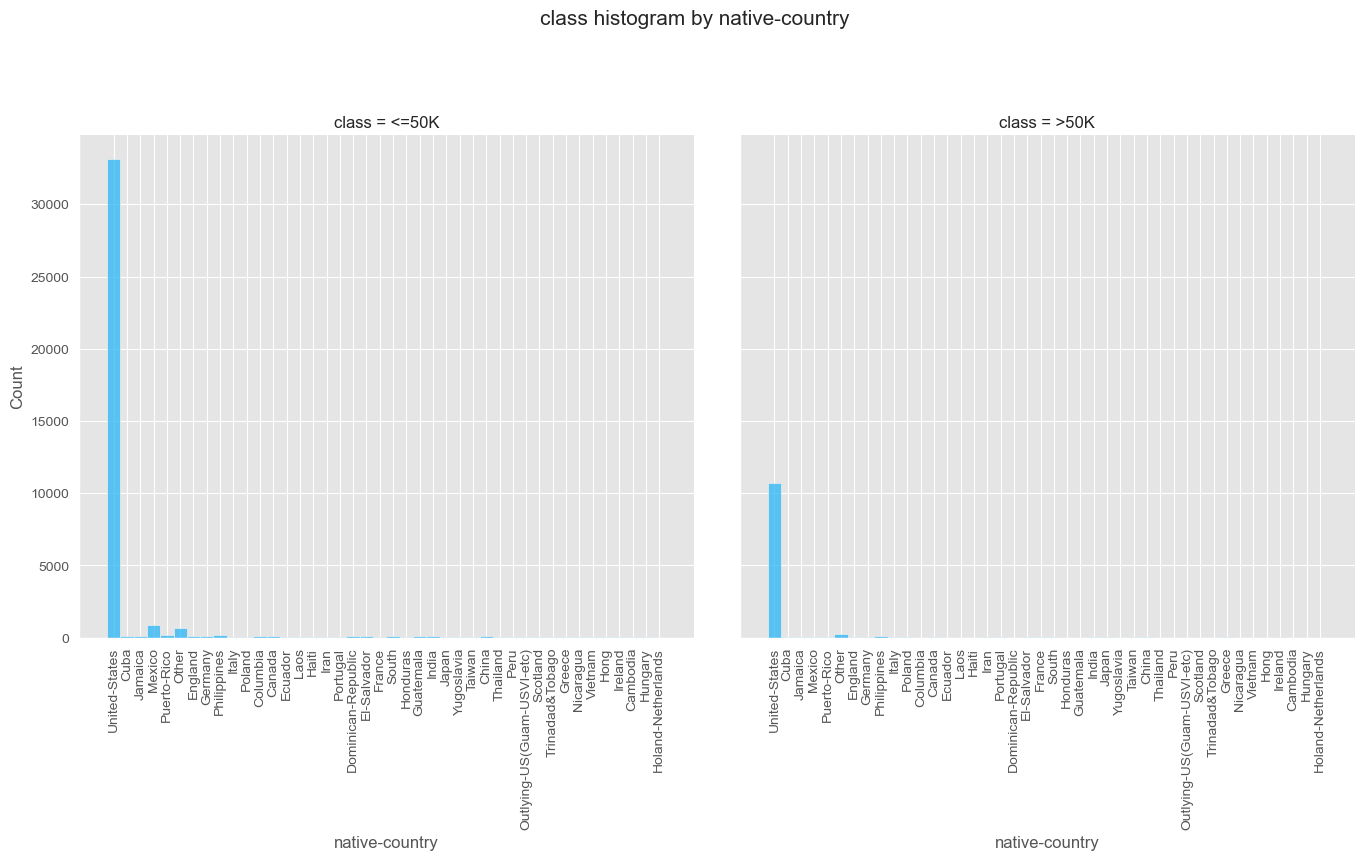

In [24]:
custom_histogram(data=alldata, main_classes='class', histo_classes='native-country', graph_height=7)

* As expected the great majority of the people is from the US

### capital-gain by class

In [25]:
#@title
def boxplot_grid(data, num_variable, cat_variable, notch = False, width = 0.2, dodge = True):
    '''
      Display multiple boxplots

      data = pandas dataframe
      num_variable = will be used to build every boxplot [string] type [numeric]
      cat_variable = will be used to split the boxpots in classes [string] type [categorical]
    '''

    fig, ax = plt.subplots(figsize=(10,10))
    sns.boxplot(y=num_variable, x= cat_variable,
                notch=notch, width=width,
                dodge=dodge,
                ax=ax,
                data=data)

    #aesthetics
    fig.suptitle(f'BoxPlot {num_variable} by {cat_variable}', fontsize= 15)
    fig.tight_layout(rect=[0, 0.1, 1, 0.93])
    ax.relim()
    #ax.autoscale_view()
    plt.savefig(f'img/{num_variable}_per_{cat_variable}.jpg')
    plt.show()

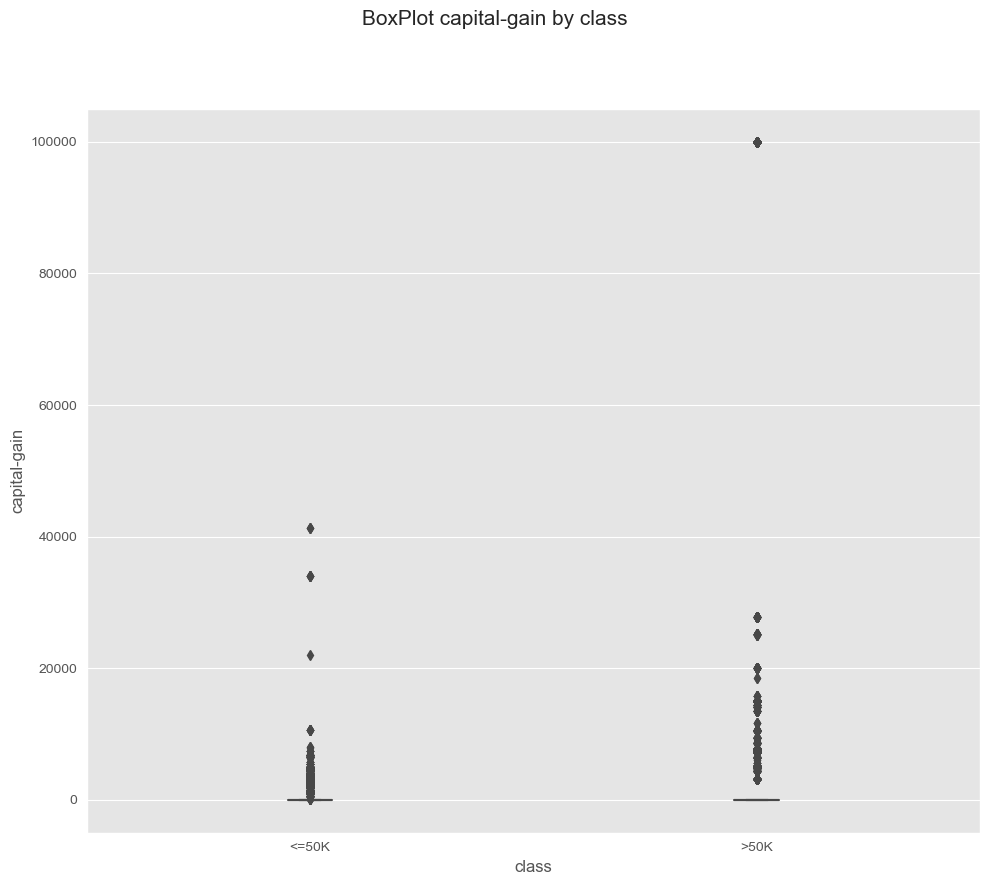

In [26]:
boxplot_grid(alldata, num_variable='capital-gain', cat_variable='class', width=0.1)

* Appeared very atypical values in both classes
* We surely have a lot of zeros in these two columns

### capital-loss by class

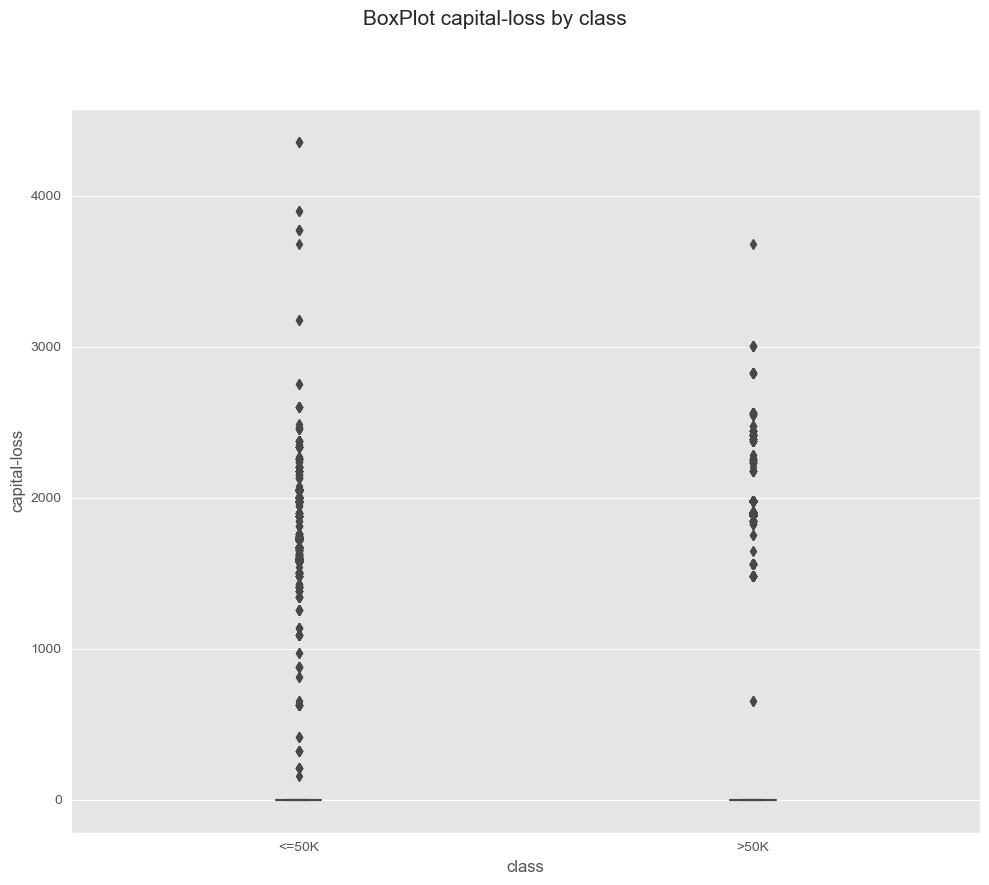

In [27]:
boxplot_grid(alldata, num_variable='capital-loss', cat_variable='class', width=0.1)

Very similar results with capital-gain


### hours-per-week by class

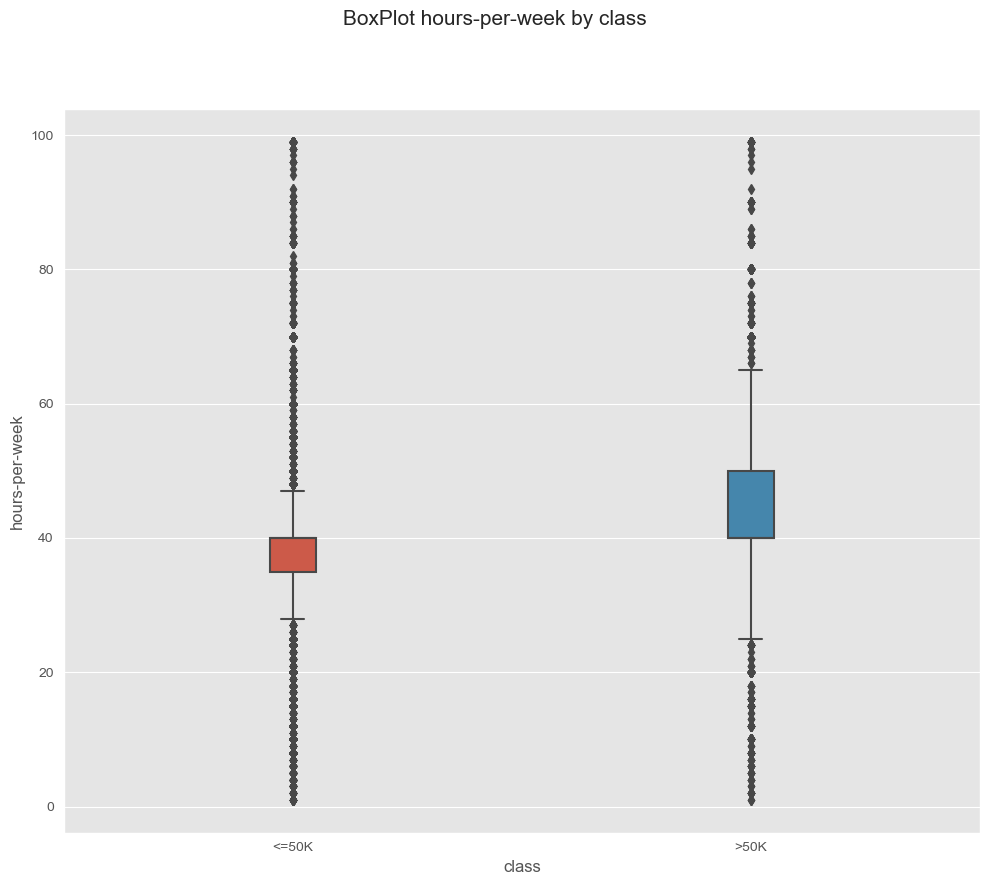

In [28]:
boxplot_grid(alldata, num_variable='hours-per-week', cat_variable='class', width=0.1)

* It looks like we have outliers in both directions, I need to analice in depth

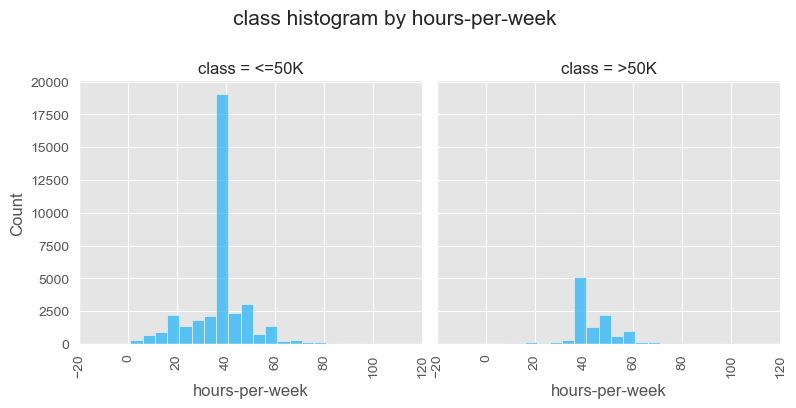

In [29]:
custom_histogram(data=alldata, main_classes='class', histo_classes='hours-per-week', graph_height=4, binwidth=5)

In [30]:
wph = alldata['hours-per-week']
print(f'Quantiles 99 and 1: {np.quantile(wph, .99), np.quantile(wph, .01)}')

Quantiles 99 and 1: (80.0, 8.0)


* I conclude that they are not all outliers, for we have those values in both classes, but I'll drop those very atypical ones, for instance values greater than 80, and lower than 8.

### Correlation plot

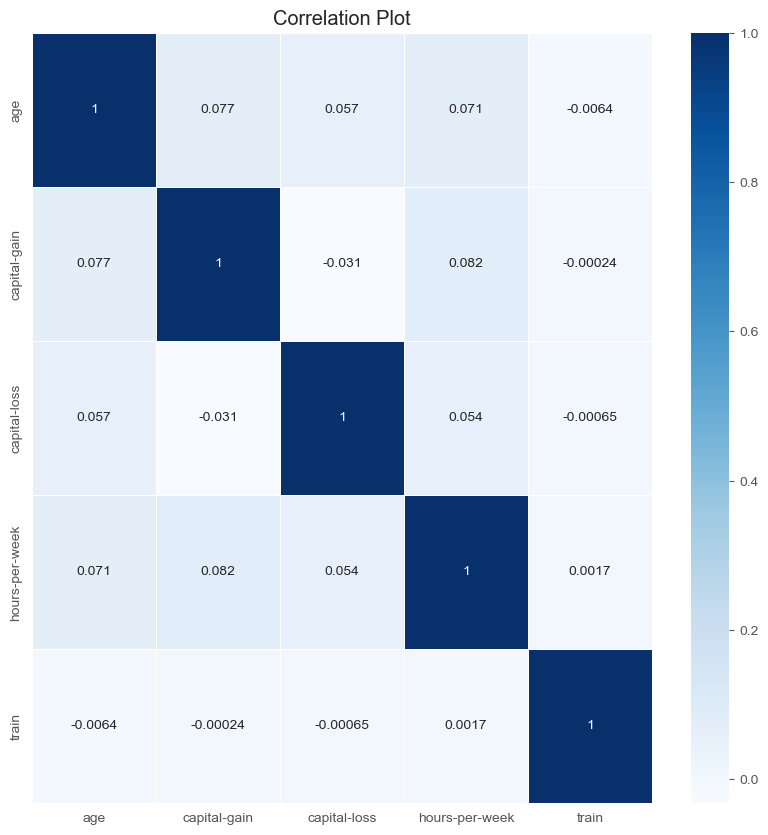

In [31]:
corr = alldata.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,
            cmap = 'Blues',
            annot = True,
            linewidth=.5,
            ax = ax)

plt.title('Correlation Plot')
plt.savefig('img/correlation_plot.jpg')
plt.show()

### Age vs Capital-gain per class

In [32]:
#@title
def multivar_analysis(data, numvar_1, numvar_2, cat_var, fig_size=(8,6)):

    '''
    note: works only with cat_var has only two classes
    :param data: dataframe
    :param numvar_1: numeric value on the x axis
    :param numvar_2: numeric value on the y axis
    :param cat_var: categorical value to split data
    :param fig_size: figure size, default (8,6)
    :return: graph with un lineplot and 2 2dhistograms
    '''

    if len(data[cat_var].unique().tolist()) == 2:
        def annotate_axes(ax, text, fontsize=18):
            ax.text(0.5, 0.5, text, transform=ax.transAxes,
                    ha="center", va="center", fontsize=fontsize, color="darkgrey")
        ## Build the multigraph
        fig = plt.figure(figsize=fig_size, layout="constrained")
        spec = fig.add_gridspec(2, 2)
        ax0 = fig.add_subplot(spec[0, :])
        ax10 = fig.add_subplot(spec[1, 0])
        ax11 = fig.add_subplot(spec[1, 1])
        ## Uncomment if want to see the identifiers of the subplots
        #annotate_axes(ax0, 'ax0')
        #annotate_axes(ax10, 'ax10')
        #annotate_axes(ax11, 'ax11')

        fig.suptitle('Multivariate analysis')
        ## Assigning the plots
        sns.lineplot(data=data, x=numvar_1, y=numvar_2, hue=cat_var, estimator='mean', ax=ax0).set_title('Centra Tendency Lines', fontsize=10)
        sns.histplot(data=data[data[cat_var] == data[cat_var].unique()[0]], x=numvar_1, y=numvar_2, ax=ax10).set_title(f'{numvar_1} vs {numvar_2} in {data[cat_var].unique()[0]}', fontsize=10)
        ax10.axvline(data[data[cat_var] == data[cat_var].unique()[0]][numvar_1].mean(), c='k', ls='--')
        sns.histplot(data=data[data[cat_var] == data[cat_var].unique()[1]], x=numvar_1, y=numvar_2, ax=ax11).set_title(f'{numvar_1} vs {numvar_2} in {data[cat_var].unique()[1]}', fontsize=10)
        ax11.axvline(data[data[cat_var] == data[cat_var].unique()[1]][numvar_1].mean(), c='k', ls='--')
        plt.tight_layout()

        plt.savefig(f"img/{numvar_1}_vs_{numvar_2}_per_{cat_var}.jpg")

    else:
        print(f'The variable {cat_var} has more than 2 classes, you must not use this function to plot')

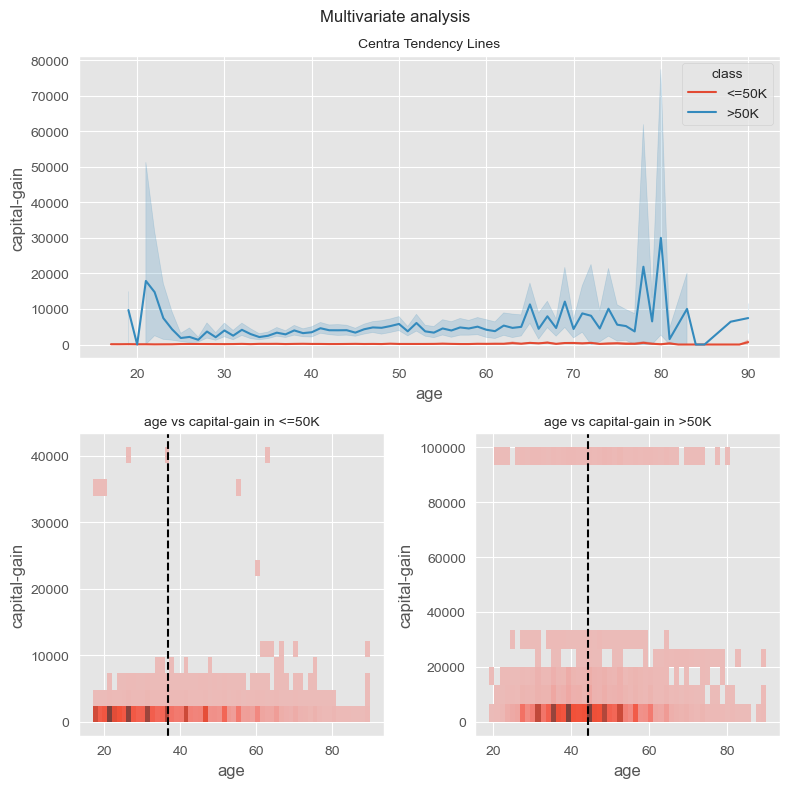

In [33]:
multivar_analysis(alldata, numvar_1='age', numvar_2='capital-gain', cat_var='class', fig_size=(8,8))

* In `<=50K` class `capital-gain` averages seems pretty low, near 0, on the contrary with `>50K` that has variability in the averages.

### age vs capital-loss per class

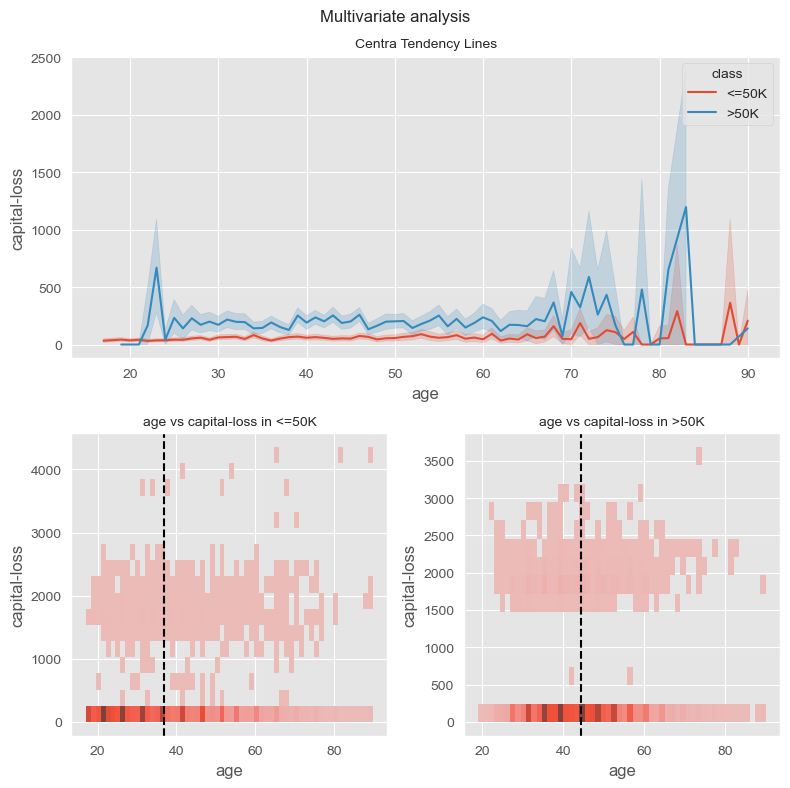

In [34]:
multivar_analysis(alldata, numvar_1='age', numvar_2='capital-loss', cat_var='class', fig_size=(8,8))

* `<=50K` class `capital-loos` averages still seems pretty low, but this time is not close 0, we find higher variablity in the older people,
*  `>50K` that has variability in the averages on all ages.

### Age vs hour-per-week per class

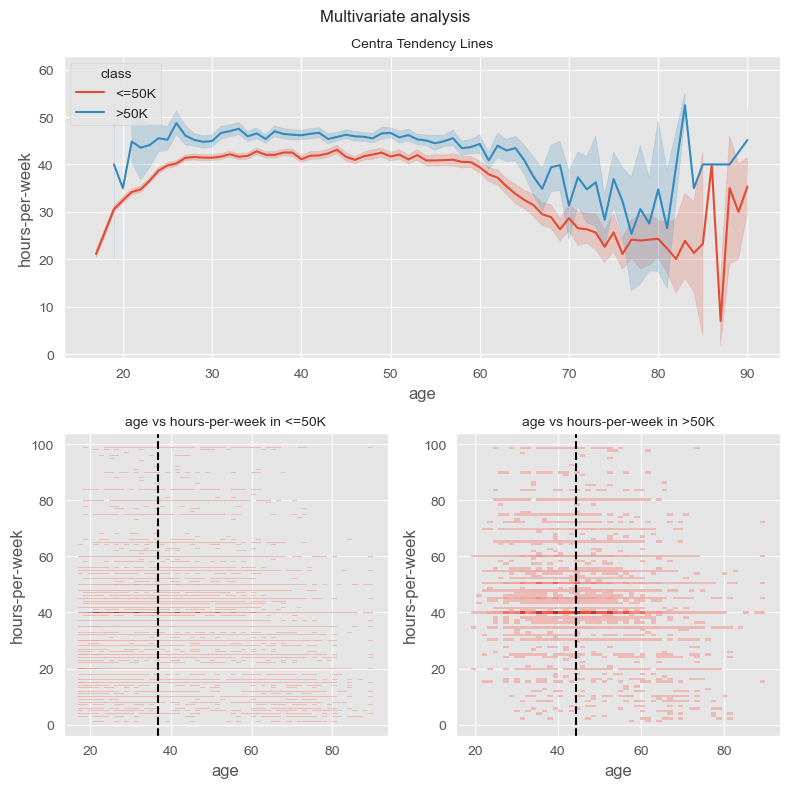

In [35]:
multivar_analysis(alldata, numvar_1='age', numvar_2='hours-per-week', cat_var='class', fig_size=(8,8))

* In avarege people of `>50K` works more thatn the people `<=50K` in every age.
* The histogram shows that also people despite there are people that works a few hours, and other works lots of hours, there are concentration between 40 and 50 hours for the people in the class `>50K`

### Feature Engineering


In [36]:
for col in alldata.select_dtypes(include='object').columns:
    print(f'Variable: {col} \n{alldata[col].unique()} \n\n')

Variable: workclass 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Other' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 


Variable: education 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 


Variable: marital-status 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 


Variable: occupation 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Other'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 


Variable: relationship 
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 


Variable: race 
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 


Variable: sex 
['Male' 'Female'] 


Variable: native-

As we see in the boxplots before, the variables `capital-gain` and `capital-loss` contain a great amount of zero values. I would explore both in depth

I'll standardize the education using the following grades.

![]( 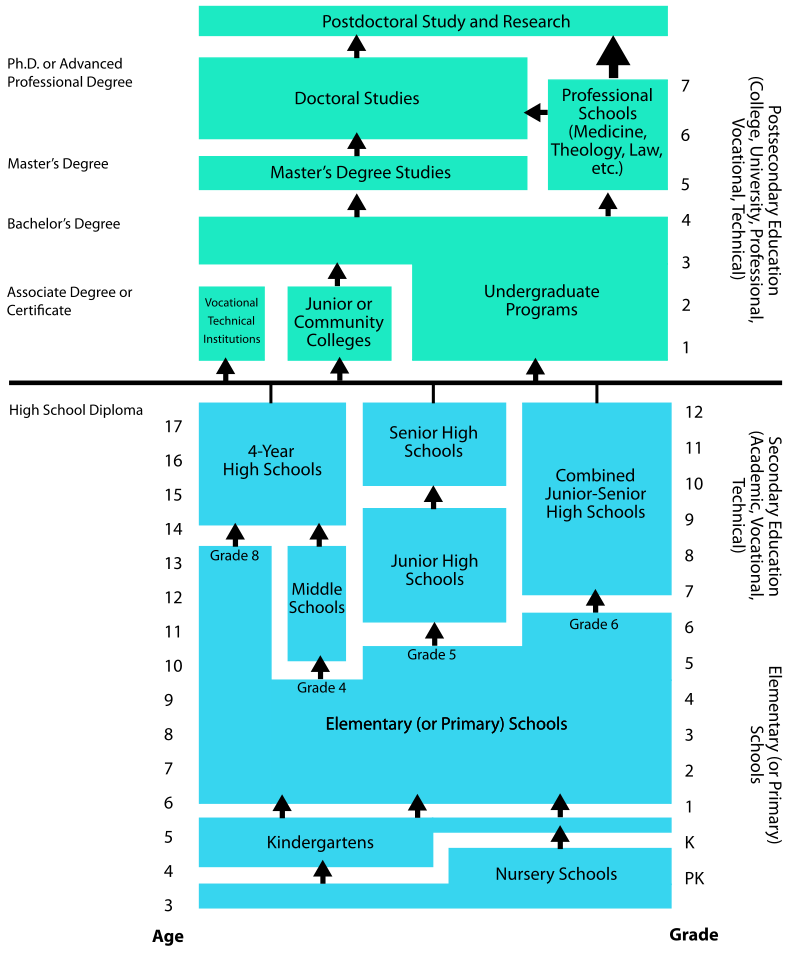)

Image from Wikipedia at the following link [](https://en.wikipedia.org/wiki/Education_in_the_United_States)

In [37]:
## Education Standarization
educ_dict = {'Bachelors': 'bachelor',
             'HS-grad': 'high-school',
             '11th': 'no-high-school',
             'Masters': 'master',
             '9th':'no-high-school',
             'Some-college':'some-College',
             'Assoc-acdm':'assoc-acdm',
             'Assoc-voc':'assoc-voc',
             '7th-8th': 'no-high-school',
             'Doctorate': 'phd',
             'Prof-school': 'prof-school',
             '5th-6th': 'no-high-school',
             '10th':'no-high-school',
             '1st-4th': 'no-high-school',
             'Preschool':'no-high-school',
             '12th':'high-school'}

alldata['education'].replace(educ_dict, inplace=True)

##Check results
alldata['education'].unique()

array(['bachelor', 'high-school', 'no-high-school', 'master',
       'some-College', 'assoc-acdm', 'assoc-voc', 'phd', 'prof-school'],
      dtype=object)

In [38]:
## marital-status standardization
marital_dict = {'Never-married': 'single',
                'Married-civ-spouse': 'married',
                'Divorced': 'divorced',
                'Married-spouse-absent': 'married',
                'Separated': 'separated',
                'Married-AF-spouse': 'married',
                'Widowed': 'widowed'}

alldata['marital-status'].replace(marital_dict, inplace=True)

##Check results
alldata['marital-status'].unique()

array(['single', 'married', 'divorced', 'separated', 'widowed'],
      dtype=object)

In [39]:
## Capital Gain and Capital-Loss amount of non zero values
cg_nozero_filter = alldata['capital-gain'] != 0
cl_nozero_filter = alldata['capital-loss'] != 0

print(f'capital-gain zeros: {len(alldata) - len(alldata["capital-gain"][cg_nozero_filter])} \ncapital-gain non_zeros: {len(alldata["capital-gain"][cg_nozero_filter])} \n' )
print(f'capital-loss zeros: {len(alldata) - len(alldata["capital-loss"][cl_nozero_filter])} \ncapital-loss non_zeros: {len(alldata["capital-loss"][cl_nozero_filter])}' )


capital-gain zeros: 44778 
capital-gain non_zeros: 4035 

capital-loss zeros: 46531 
capital-loss non_zeros: 2282


I'll turn capital-gain and capital-loss into categorial values.

In [40]:
alldata['capital-gain'] = alldata['capital-gain'].apply(lambda x: 'gain' if x != 0 else 'no gain')
alldata['capital-loss'] = alldata['capital-loss'].apply(lambda x: 'loss' if x != 0 else 'no loss')

In [41]:
alldata.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,train
0,39,State-gov,bachelor,single,Adm-clerical,Not-in-family,White,Male,gain,no loss,40,United-States,<=50K,1
1,50,Self-emp-not-inc,bachelor,married,Exec-managerial,Husband,White,Male,no gain,no loss,13,United-States,<=50K,1
2,38,Private,high-school,divorced,Handlers-cleaners,Not-in-family,White,Male,no gain,no loss,40,United-States,<=50K,1
3,53,Private,no-high-school,married,Handlers-cleaners,Husband,Black,Male,no gain,no loss,40,United-States,<=50K,1
4,28,Private,bachelor,married,Prof-specialty,Wife,Black,Female,no gain,no loss,40,Cuba,<=50K,1


I'll aggregate the ages into groups.

In [42]:

### aggregated ages
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['<18', '18-30', '31-40', '41-50', '51-60', '61-70', '71>=']
alldata['age_group'] = pd.cut(alldata['age'], bins, labels = labels, include_lowest = True)

## checking results
alldata.loc[:,['age', 'age_group']].sample(5)

,age,age_group
38570,34,31-40
1621,44,41-50
21728,23,18-30
8312,28,18-30
10730,42,41-50


I'll drop `Age` columns

In [43]:
alldata.drop(columns='age', inplace=True)

In [44]:
low = np.quantile(alldata["hours-per-week"], .01)
hi  = np.quantile(alldata["hours-per-week"], .99)

alldata_f1 = alldata[(alldata["hours-per-week"] < hi) & (alldata["hours-per-week"] > low)]

In [45]:
len(alldata_f1)

47612

In [46]:
alldata_f1.sample(5)

,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,train,age_group
44758,Private,some-College,married,Machine-op-inspct,Husband,White,Male,no gain,no loss,46,United-States,<=50K,0,18-30
2485,Private,high-school,married,Craft-repair,Husband,White,Male,no gain,no loss,40,United-States,<=50K,1,18-30
48518,Private,some-College,divorced,Craft-repair,Unmarried,White,Male,no gain,no loss,30,United-States,<=50K,0,41-50
18286,Private,assoc-acdm,married,Exec-managerial,Husband,White,Male,no gain,no loss,40,United-States,>50K,1,51-60
30917,Private,high-school,married,Sales,Husband,White,Male,no gain,no loss,40,United-States,<=50K,1,41-50


Finally, turn `class` into numeric categories 0 or 1.

In [47]:
class_num = {'<=50K': 0, '>50K':1}
alldata_f1['class'].replace(class_num, inplace=True)

## show results
alldata_f1.sample(5)

,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,train,age_group
44155,Private,high-school,divorced,Craft-repair,Not-in-family,White,Male,no gain,no loss,20,United-States,0,0,18-30
14045,Local-gov,high-school,married,Transport-moving,Husband,White,Male,no gain,no loss,40,United-States,1,1,51-60
18227,Private,some-College,separated,Sales,Not-in-family,White,Male,no gain,no loss,45,United-States,0,1,31-40
26256,Private,some-College,divorced,Tech-support,Unmarried,White,Male,no gain,no loss,40,United-States,0,1,18-30
6131,Other,no-high-school,married,Other,Wife,Other,Female,no gain,no loss,40,Mexico,0,1,18-30


## MODELING

As the data is labeled in train or test, then I will split using that rule.

In [48]:
train = alldata_f1[alldata_f1['train'] == 1]
train.drop(columns='train', inplace=True)
test = alldata_f1[alldata_f1['train'] == 0]
test.drop(columns='train', inplace=True)

In [49]:
##Split
X_train = train.drop(columns='class')
y_train = train['class']

X_test = test.drop(columns='class')
y_test = test['class']

In [50]:
print(f'Shape of the Train data {X_train.shape}')
print(f'Shape of the Test data {X_test.shape}')

Shape of the Train data (31756, 12)
Shape of the Test data (15856, 12)


In [51]:
y_train.value_counts()

0    24081
1     7675
Name: class, dtype: int64

### Preprocessing Pipeline

In [52]:
## Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

#Scaler
scaler = StandardScaler()

## One-Hot Enconder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

## Pipeline Step 1
numeric_pipe = make_pipeline(scaler)
categorical_pipe = make_pipeline(ohe)

## Instantiate Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

## Preprocessor
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = 'drop')

In [53]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000215576D3E80>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000215576D3E20>)])

In [54]:
#@title
## Metrics Function
def evaluate_classification(y_test, y_preds, label="Test Data"):
    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)
    # print the classification report from the test data
    print(classification_report(y_test, y_preds))

    fig, axes = plt.subplots(1,2, figsize=(15,5))

    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_test, y_preds,
                                            normalize='true', cmap='Greens',
                                            ax = axes[0])

    RocCurveDisplay.from_predictions(y_test, y_preds, ax=axes[1])
    axes[1].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
    plt.legend()
    plt.show()

    plt.savefig(f'img/{label}.jpg')

    ## Taken from the Week 7 > Code Along > Class 2

### Baseline Model

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Base Line on Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12098
           1       0.00      0.00      0.00      3758

    accuracy                           0.76     15856
   macro avg       0.38      0.50      0.43     15856
weighted avg       0.58      0.76      0.66     15856



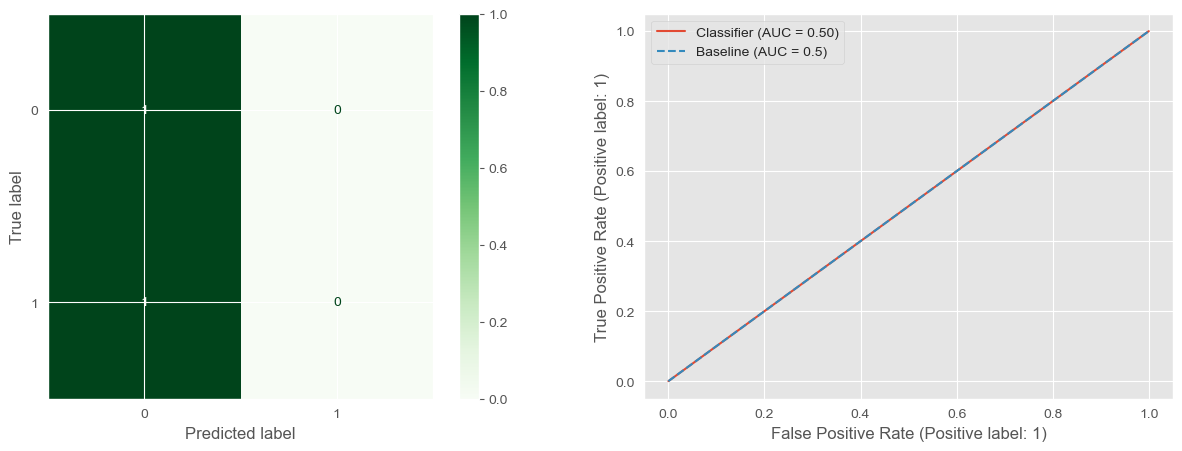

<Figure size 640x480 with 0 Axes>

In [55]:
## baseline
base = DummyClassifier(random_state=42)

##putting into the pipeline
base_pipe = make_pipeline(preprocessor, base)

## Fit
base_pipe.fit(X_train, y_train)

## predict
base_predictions = base_pipe.predict(X_test)

## Metrics
evaluate_classification(y_test, base_predictions, label='Base Line on Test Data')

### Logistic Regression

From now on, I'll use GridSearchCV to get the model already with tuned hyperparameters

In [56]:
%%time
## Tuning Hyperparameters using GridSearchCV.
lreg = LogisticRegression(random_state=42, solver='liblinear')

## Instantiating SMOTE for imbalance
smote = SMOTE(random_state=42)

## Putting into pipeline
lreg_pipe = make_sampler_pipeline(preprocessor, smote, lreg)

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
              'logisticregression__penalty': ['l1', 'l2']
              }

## loading the Logistic regression pipeline into the GridSearchCV
lr_pipe_gs = GridSearchCV(lreg_pipe,
                          param_grid,
                          cv=5,
                          n_jobs=-1,
                          scoring='f1'
                          )

## Fit
lr_pipe_gs.fit(X_train, y_train)


CPU times: total: 5.67 s
Wall time: 55.3 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000215576D3E80>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000215576D3E20>)])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                         'logisticregression__penalty': ['l1', 'l2']},
             scoring='f1')

In [57]:
## get best params
lr_pipe_gs.best_params_

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}

In [58]:
## Saving best Model
best_lreg = lr_pipe_gs.best_estimator_

In [59]:
%%time
## Predictions on test set
lreg_preds = best_lreg.predict(X_test)

CPU times: total: 46.9 ms
Wall time: 72.2 ms


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Logistic Regression on Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     12098
           1       0.55      0.83      0.66      3758

    accuracy                           0.80     15856
   macro avg       0.74      0.81      0.76     15856
weighted avg       0.85      0.80      0.81     15856



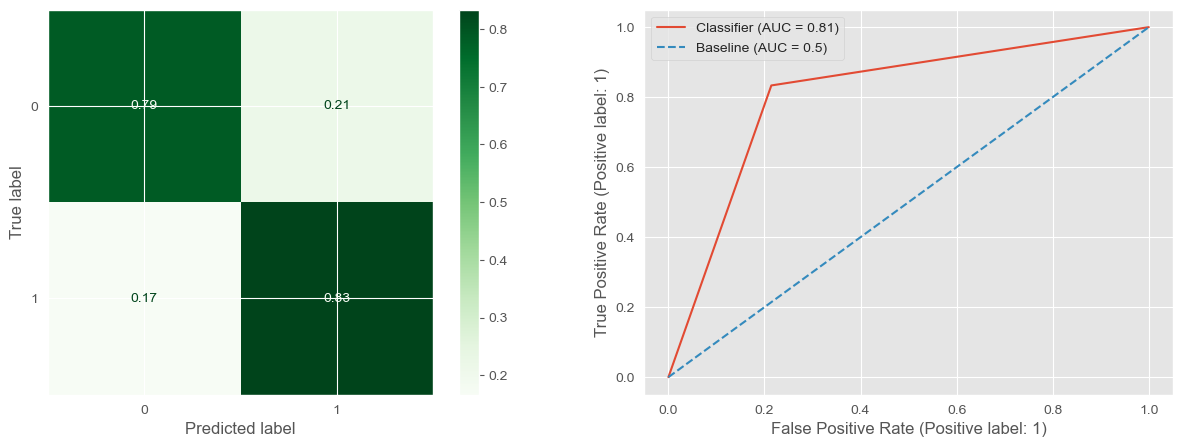

<Figure size 640x480 with 0 Axes>

In [60]:
## Metrics
lreg_metrix = evaluate_classification(y_test, lreg_preds, label='Logistic Regression on Test Data')
lreg_metrix

### KNN

In [61]:
%%time
## Instantiate KNN
knn = KNeighborsClassifier()

## Putting into pipeline
knn_pipe = make_sampler_pipeline(preprocessor, smote, knn)

param_grid = {'kneighborsclassifier__n_neighbors': list(range(1,10,1))
              }

## loading the Logistic regression pipeline into the GridSearchCV
knn_pipe_gs = GridSearchCV(knn_pipe,
                          param_grid,
                          cv=5,
                          n_jobs=-1,
                          scoring='f1'
                          )

## Fit
knn_pipe_gs.fit(X_train, y_train)


CPU times: total: 5 s
Wall time: 44.3 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000215576D3E80>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000215576D3E20>)])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9]},
             scoring='f1')

In [62]:
## get best params
knn_pipe_gs.best_params_

{'kneighborsclassifier__n_neighbors': 9}

In [63]:
## Saving best Model
best_knn = knn_pipe_gs.best_estimator_

In [64]:
%%time
## Predictions on test set
knn_preds = best_knn.predict(X_test)

CPU times: total: 11.8 s
Wall time: 2.95 s


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN on Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     12098
           1       0.55      0.70      0.61      3758

    accuracy                           0.79     15856
   macro avg       0.72      0.76      0.73     15856
weighted avg       0.81      0.79      0.80     15856



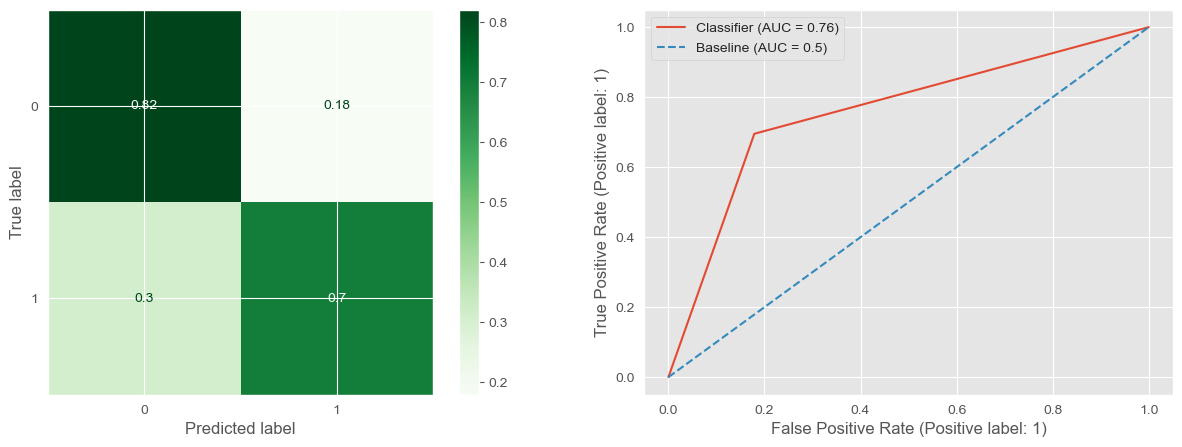

<Figure size 640x480 with 0 Axes>

In [65]:
##Metrics
knn_metrix = evaluate_classification(y_test, knn_preds, label='KNN on Test Data')
knn_metrix

### XGBoost

In [66]:
%%time
#instantiate xgboost
xgboost = XGBClassifier(use_label_encoder=False, random_state=42)
## pipeline
xgboost_pipe = make_sampler_pipeline(preprocessor, smote, xgboost)

param_grid = {'xgbclassifier__booster': ['gbtree', 'gblinear'],
              'xgbclassifier__max_depth': list(range(5,10,1))
              }

## loading the Logistic regression pipeline into the GridSearchCV
xgboost_pipe_gs = GridSearchCV(xgboost_pipe,
                           param_grid,
                           cv=5,
                           n_jobs=4,
                           scoring='f1'
                           )

##Fit model
xgboost_pipe_gs.fit(X_train, y_train)

[11:45:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 29.2 s
Wall time: 2min 49s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000215576D3E80>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))...
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      use_label_encoder=False,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=4,
             param_grid={'xgbclassifier__booster': ['gbtree', 'gblinear'],
                         'xgbclassifier__max_depth': [5, 6, 7, 8, 9]},
             scoring='f1')

In [67]:
##Best Params
xgboost_pipe_gs.best_params_

{'xgbclassifier__booster': 'gbtree', 'xgbclassifier__max_depth': 5}

In [68]:
## Saving best model
best_xgb = xgboost_pipe_gs.best_estimator_

In [69]:
%%time
## predictions
xgb_preds = best_xgb.predict(X_test)

CPU times: total: 93.8 ms
Wall time: 91.2 ms


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost on Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     12098
           1       0.59      0.76      0.66      3758

    accuracy                           0.82     15856
   macro avg       0.75      0.80      0.77     15856
weighted avg       0.84      0.82      0.82     15856



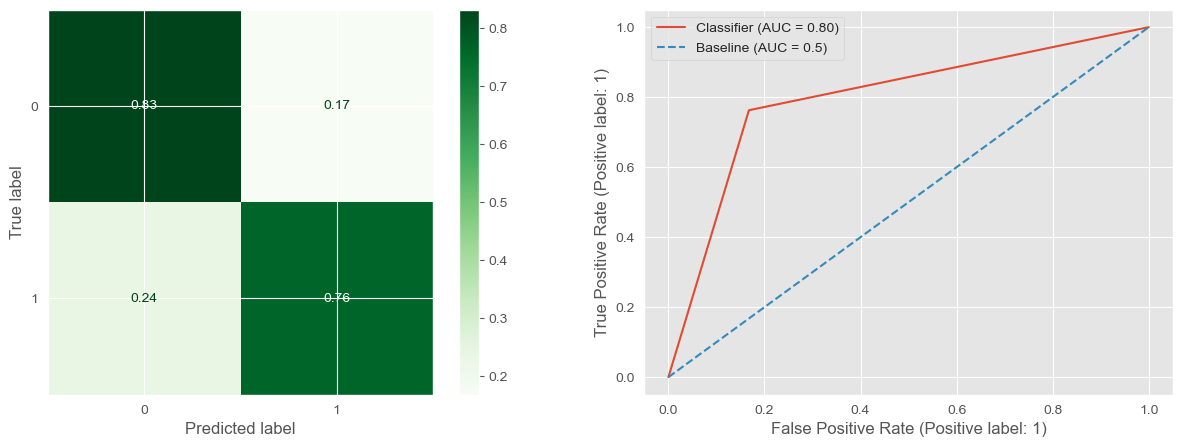

<Figure size 640x480 with 0 Axes>

In [70]:
xgb_metrix = evaluate_classification(y_test, xgb_preds, label='XGBoost on Test Data')
xgb_metrix

**Model review**

Logistic Regresion
* Accuracy: .80
* Precision: .55
* Recall: .83

KNN:
* Accuracy: .79
* Precision: .55
* Recall: .70

XGBoost
* Accuracy: .82
* Precision: .59
* Recall: .76

The three models did it bad in precision, very low precision, but if we see at accuracy and recall, Logistic Performed better.

I am giving importance to recall because is telling me how many of the of the positive cases were predicted correctly over all the positive. This is very important if I am trying to predict who is waging more than 50K a year, I want to predict this value correctly.


### PCA

I will perform PCA on the chosen model, in order to see if it gets improved.

In [71]:
## Instantiate PCA
pca = PCA(n_components=.95)

## Instantiate the Logistic Regression using the tuned hyper-parameters
lreg_tuned = LogisticRegression(random_state=42, solver='liblinear')

## Instantiating SMOTE for imbalance
smote = SMOTE(random_state=42)

## Putting into pipeline
lreg_pca_pipe = make_sampler_pipeline(preprocessor, pca, smote, lreg_tuned)

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
              'logisticregression__penalty': ['l1', 'l2']
              }

## loading the Logistic regression pipeline into the GridSearchCV
lr_pipe_pca_gs = GridSearchCV(lreg_pca_pipe,
                          param_grid,
                          cv=5,
                          n_jobs=-1,
                          scoring='f1'
                          )

In [72]:
%%time

#Fit
lr_pipe_pca_gs.fit(X_train, y_train)

CPU times: total: 6.09 s
Wall time: 26.2 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000215576D3E80>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000215576D3E20>)])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('smote', SMOTE(random_state=42)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                         'logisticregression__penalty': ['l1', 'l2']},
             scoring='f1')

In [73]:
## Best Params
lr_pipe_pca_gs.best_params_

{'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}

In [74]:
## Save Best model
best_lreg_pca = lr_pipe_pca_gs.best_estimator_

In [75]:
%%time
## Make predictions
lreg_pca_preds = best_lreg_pca.predict(X_test)

CPU times: total: 0 ns
Wall time: 109 ms


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Logistic Regression with PCA on Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     12098
           1       0.54      0.84      0.66      3758

    accuracy                           0.79     15856
   macro avg       0.74      0.81      0.75     15856
weighted avg       0.84      0.79      0.81     15856



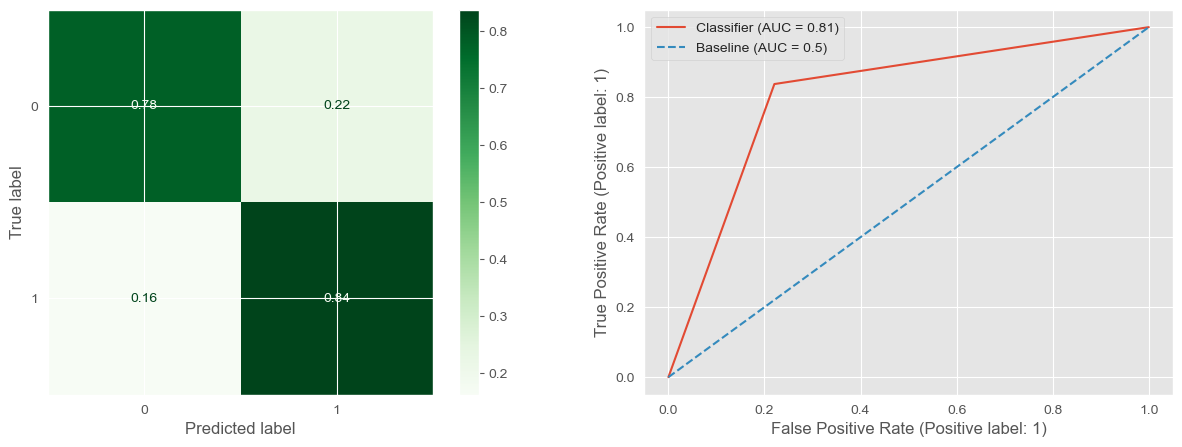

<Figure size 640x480 with 0 Axes>

In [76]:
lreg_pca_metrix = evaluate_classification(y_test, lreg_pca_preds, label='Logistic Regression with PCA on Test Data')
lreg_pca_metrix

Comparing with the Logistic Regression without PCA

With Out PCA
* Accuracy =.80
* Precision =.55
* Recall =.83

With PCA
* Accuracy = .79
* Precision = .54
* Recall = .84

Then, the model performed better without PCA.

## Recommendation

Despite PCA is a powerful tool for avoiding overfiting, in this case, it didn't add performance to the model. I recomend the Logistic Regression without the PCA.